In [1]:
###################################################################################################
# Project: 
#          
# Lenguaje: Python / jupyter
# Description:
#
# References: 
# Git Control:
# Author : Sahenjit Paul - Camilo Blanco Vargas - Year: 2021 
# Mail shanks.p.95@gmail.com -:mail@camiloblanco.com 
###################################################################################################

In [2]:
# Import the necesary libraries
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import timedelta
import Oanda_Manager as om

In [3]:
# Create an Oanda_Manager object to connect to Oanda API
account = pd.read_csv('Account_details.csv')
API_KEY=account.iloc[0, 0]
Account_ID=account.iloc[0, 1]
Oanda_URL=account.iloc[0, 2]
oandaAcc =  om.Oanda_Manager(API_KEY,Account_ID, Oanda_URL,{'Authorization': f'Bearer {API_KEY}'})
print(oandaAcc.account_list())

(200, {'accounts': [{'id': '101-004-19105515-001', 'tags': []}]})


In [18]:
# Retrieve the index data as a time-series dataframe usign a date range
#https://developer.oanda.com/rest-live-v20/instrument-df/#CandlestickGranularity
asset_name="SPX500_USD"
#granularity="H4"
granularity="M"
from_date = pd.to_datetime('1/1/2003')
to_date  = pd.to_datetime('12/31/2020')
candle_data = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
candle_data.head()

,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
time,,,,,,,,,,,,,
2003-03-31 22:00:00,16324.0,847.5,924.6,846.8,916.9,847.5,924.6,846.8,916.9,847.5,924.6,846.8,916.9
2003-04-30 21:00:00,15148.0,915.6,965.9,902.6,965.4,915.6,965.9,902.6,965.4,915.6,965.9,902.6,965.4
2003-05-31 21:00:00,175511.0,968.6,1016.8,963.8,974.8,968.6,1016.8,963.8,974.8,968.6,1016.8,963.8,974.8
2003-06-30 21:00:00,244059.0,973.3,1016.1,961.7,989.7,973.3,1016.1,961.7,989.7,973.3,1016.1,961.7,989.7
2003-07-31 21:00:00,197146.0,989.9,1012.8,959.1,1008.4,989.9,1012.8,959.1,1008.4,989.9,1012.8,959.1,1008.4


In [19]:
# Print the info of the resulting timeIndex dataframe
candle_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2003-03-31 22:00:00 to 2020-11-30 22:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  213 non-null    float64
 1   mid_o   213 non-null    float64
 2   mid_h   213 non-null    float64
 3   mid_l   213 non-null    float64
 4   mid_c   213 non-null    float64
 5   bid_o   213 non-null    float64
 6   bid_h   213 non-null    float64
 7   bid_l   213 non-null    float64
 8   bid_c   213 non-null    float64
 9   ask_o   213 non-null    float64
 10  ask_h   213 non-null    float64
 11  ask_l   213 non-null    float64
 12  ask_c   213 non-null    float64
dtypes: float64(13)
memory usage: 23.3 KB


In [20]:
# Describe the date
index_stats = candle_data.describe()
index_stats = index_stats.transpose()
index_stats

,count,mean,std,min,25%,50%,75%,max
volume,213.0,410613.234742,530497.661961,15148.0,175511.0,253343.0,411129.0,3800519.0
mid_o,213.0,1730.677934,684.657131,732.1,1192.4,1423.7,2108.4,3634.2
mid_h,213.0,1789.604695,714.406878,834.2,1229.5,1473.9,2169.4,3763.8
mid_l,213.0,1672.268075,664.240520,666.3,1167.8,1395.9,2061.0,3608.6
mid_c,213.0,1744.788732,697.054376,733.9,1200.4,1436.3,2127.4,3759.8
bid_o,213.0,1730.503146,684.547012,732.1,1192.4,1423.7,2108.3,3634.0
bid_h,213.0,1789.472817,714.316825,834.2,1229.5,1473.9,2169.1,3763.7
bid_l,213.0,1672.101878,664.119299,666.3,1167.8,1395.5,2060.6,3608.3
bid_c,213.0,1744.641878,696.963857,733.9,1200.4,1436.3,2127.0,3759.6
ask_o,213.0,1730.849155,684.763836,732.1,1192.4,1423.7,2108.6,3634.4


<AxesSubplot:xlabel='time'>

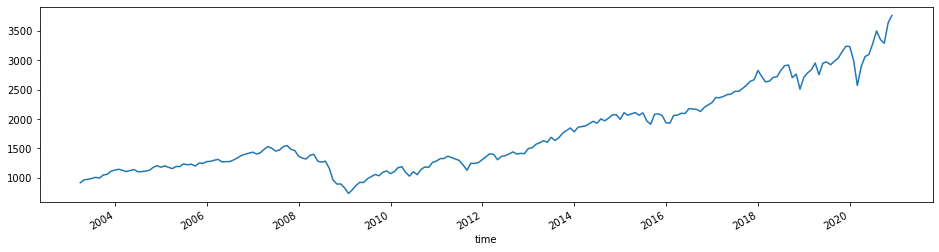

In [21]:
# Plot the medium closing price
plt.figure(figsize=(16,4))
candle_data['mid_c'].plot()

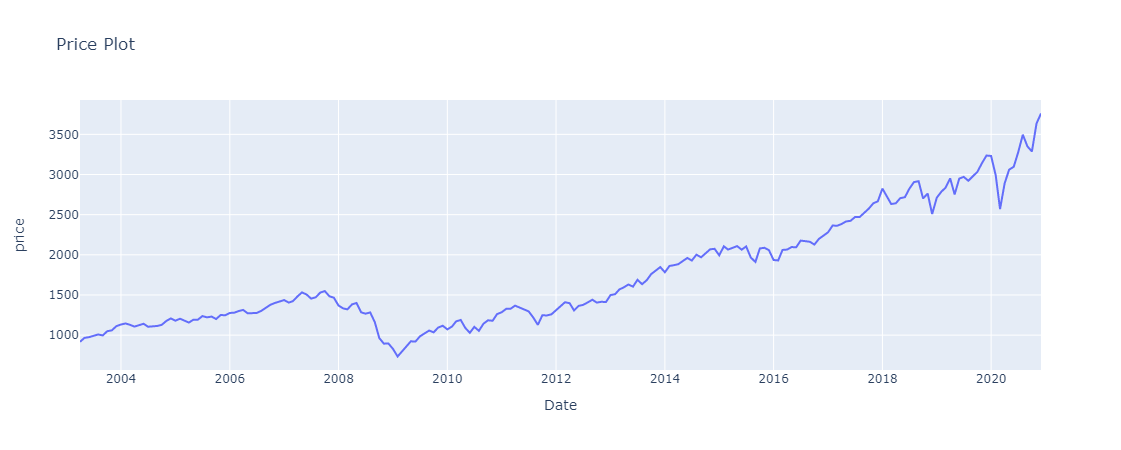

In [22]:
sp500_data = go.Scatter(x=candle_data.index, y=candle_data['mid_c'])
layout = go.Layout(title='Price Plot', xaxis=dict(title='Date'), yaxis=dict(title='price'))
fig = go.Figure(data=[sp500_data], layout=layout)
fig.show()

In [23]:
from_date = pd.to_datetime('1-1-2003')
to_date  = pd.to_datetime('5-16-2021')
to_date - from_date



Timedelta('6710 days 00:00:00')

In [25]:
from_date+ timedelta(days=200)

Timestamp('2003-07-20 00:00:00')

In [26]:
df1 = pd.DataFrame({'player': ['A', 'B', 'C', 'D', 'E'],
                    'points':[12, 5, 13, 17, 27]})

df2 = pd.DataFrame({'player': ['F', 'G', 'H', 'I', 'J'],
                    'points':[24, 26, 27, 27, 12]})

df3 = pd.concat([df1,df2])


In [35]:
granularity="H4"
from_date = pd.to_datetime('1/1/2003')
to_date  = pd.to_datetime('12/31/2003')
candle_data_2003 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2004')
to_date  = pd.to_datetime('12/31/2004')
candle_data_2004 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2005')
to_date  = pd.to_datetime('12/31/2005')
candle_data_2005 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2006')
to_date  = pd.to_datetime('12/31/2006')
candle_data_2006 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
from_date = pd.to_datetime('1/1/2007')
to_date  = pd.to_datetime('12/31/2007')
candle_data_2007 = oandaAcc.get_candles_dates(asset_name, granularity,from_date,to_date)
candle_data_2003_2007 = pd.concat([candle_data_2003,candle_data_2004,candle_data_2005,candle_data_2006,candle_data_2007])


In [36]:
candle_data_2003_2007.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7162 entries, 2003-03-21 18:00:00 to 2007-12-30 22:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  7162 non-null   float64
 1   mid_o   7162 non-null   float64
 2   mid_h   7162 non-null   float64
 3   mid_l   7162 non-null   float64
 4   mid_c   7162 non-null   float64
 5   bid_o   7162 non-null   float64
 6   bid_h   7162 non-null   float64
 7   bid_l   7162 non-null   float64
 8   bid_c   7162 non-null   float64
 9   ask_o   7162 non-null   float64
 10  ask_h   7162 non-null   float64
 11  ask_l   7162 non-null   float64
 12  ask_c   7162 non-null   float64
dtypes: float64(13)
memory usage: 783.3 KB


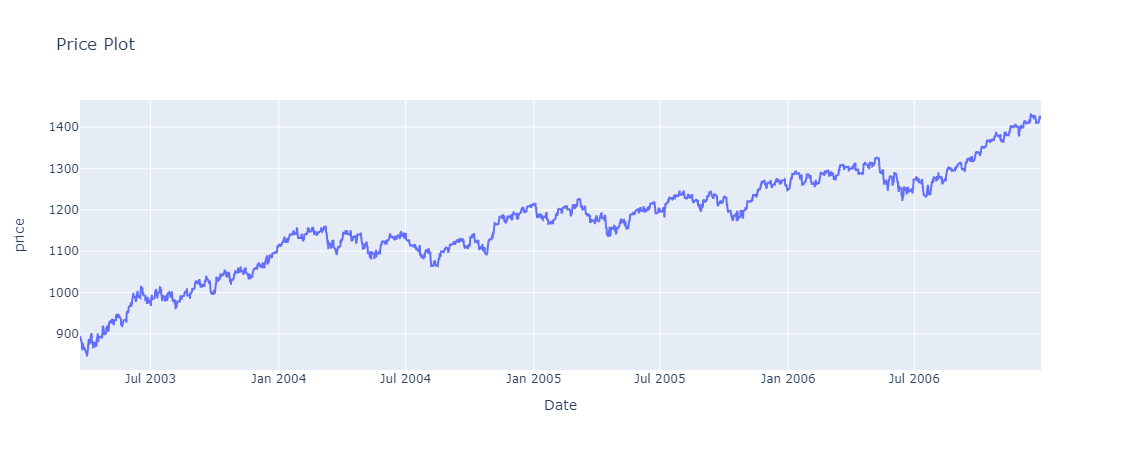

In [37]:
sp500_data = go.Scatter(x=candle_data_2003_2006.index, y=candle_data_2003_2006['mid_c'])
layout = go.Layout(title='Price Plot', xaxis=dict(title='Date'), yaxis=dict(title='price'))
fig = go.Figure(data=[sp500_data], layout=layout)
fig.show()